# Importing Libraries

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [120]:
df = pd.read_csv("heart.csv")

# Exploring the Data

In [121]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [122]:
df.shape

(303, 14)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [124]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


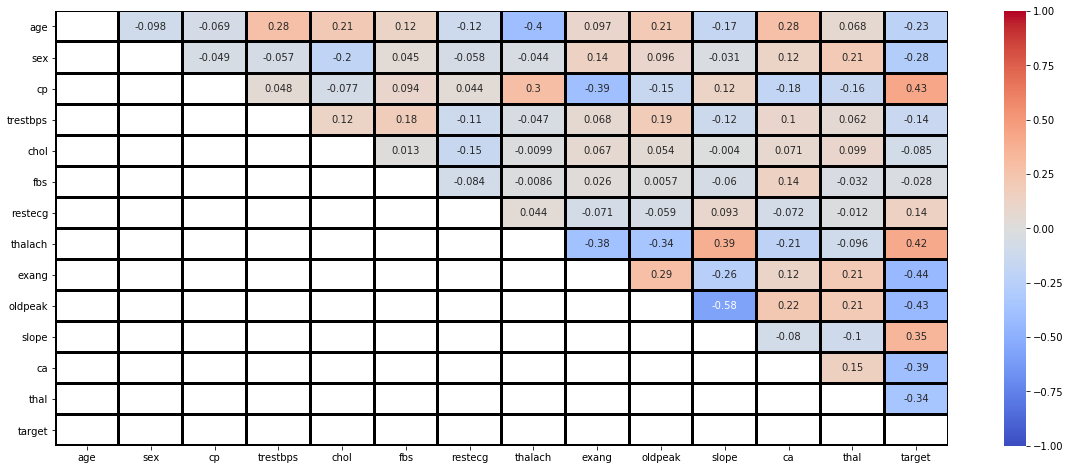

In [125]:
# Correlation Heat-Map
d = df.corr()
f, ax = plt.subplots(figsize=(20,8))
mask = np.tril(d)
sns.heatmap(d, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt= '.2g', linewidths=2, linecolor='black')
plt.show()

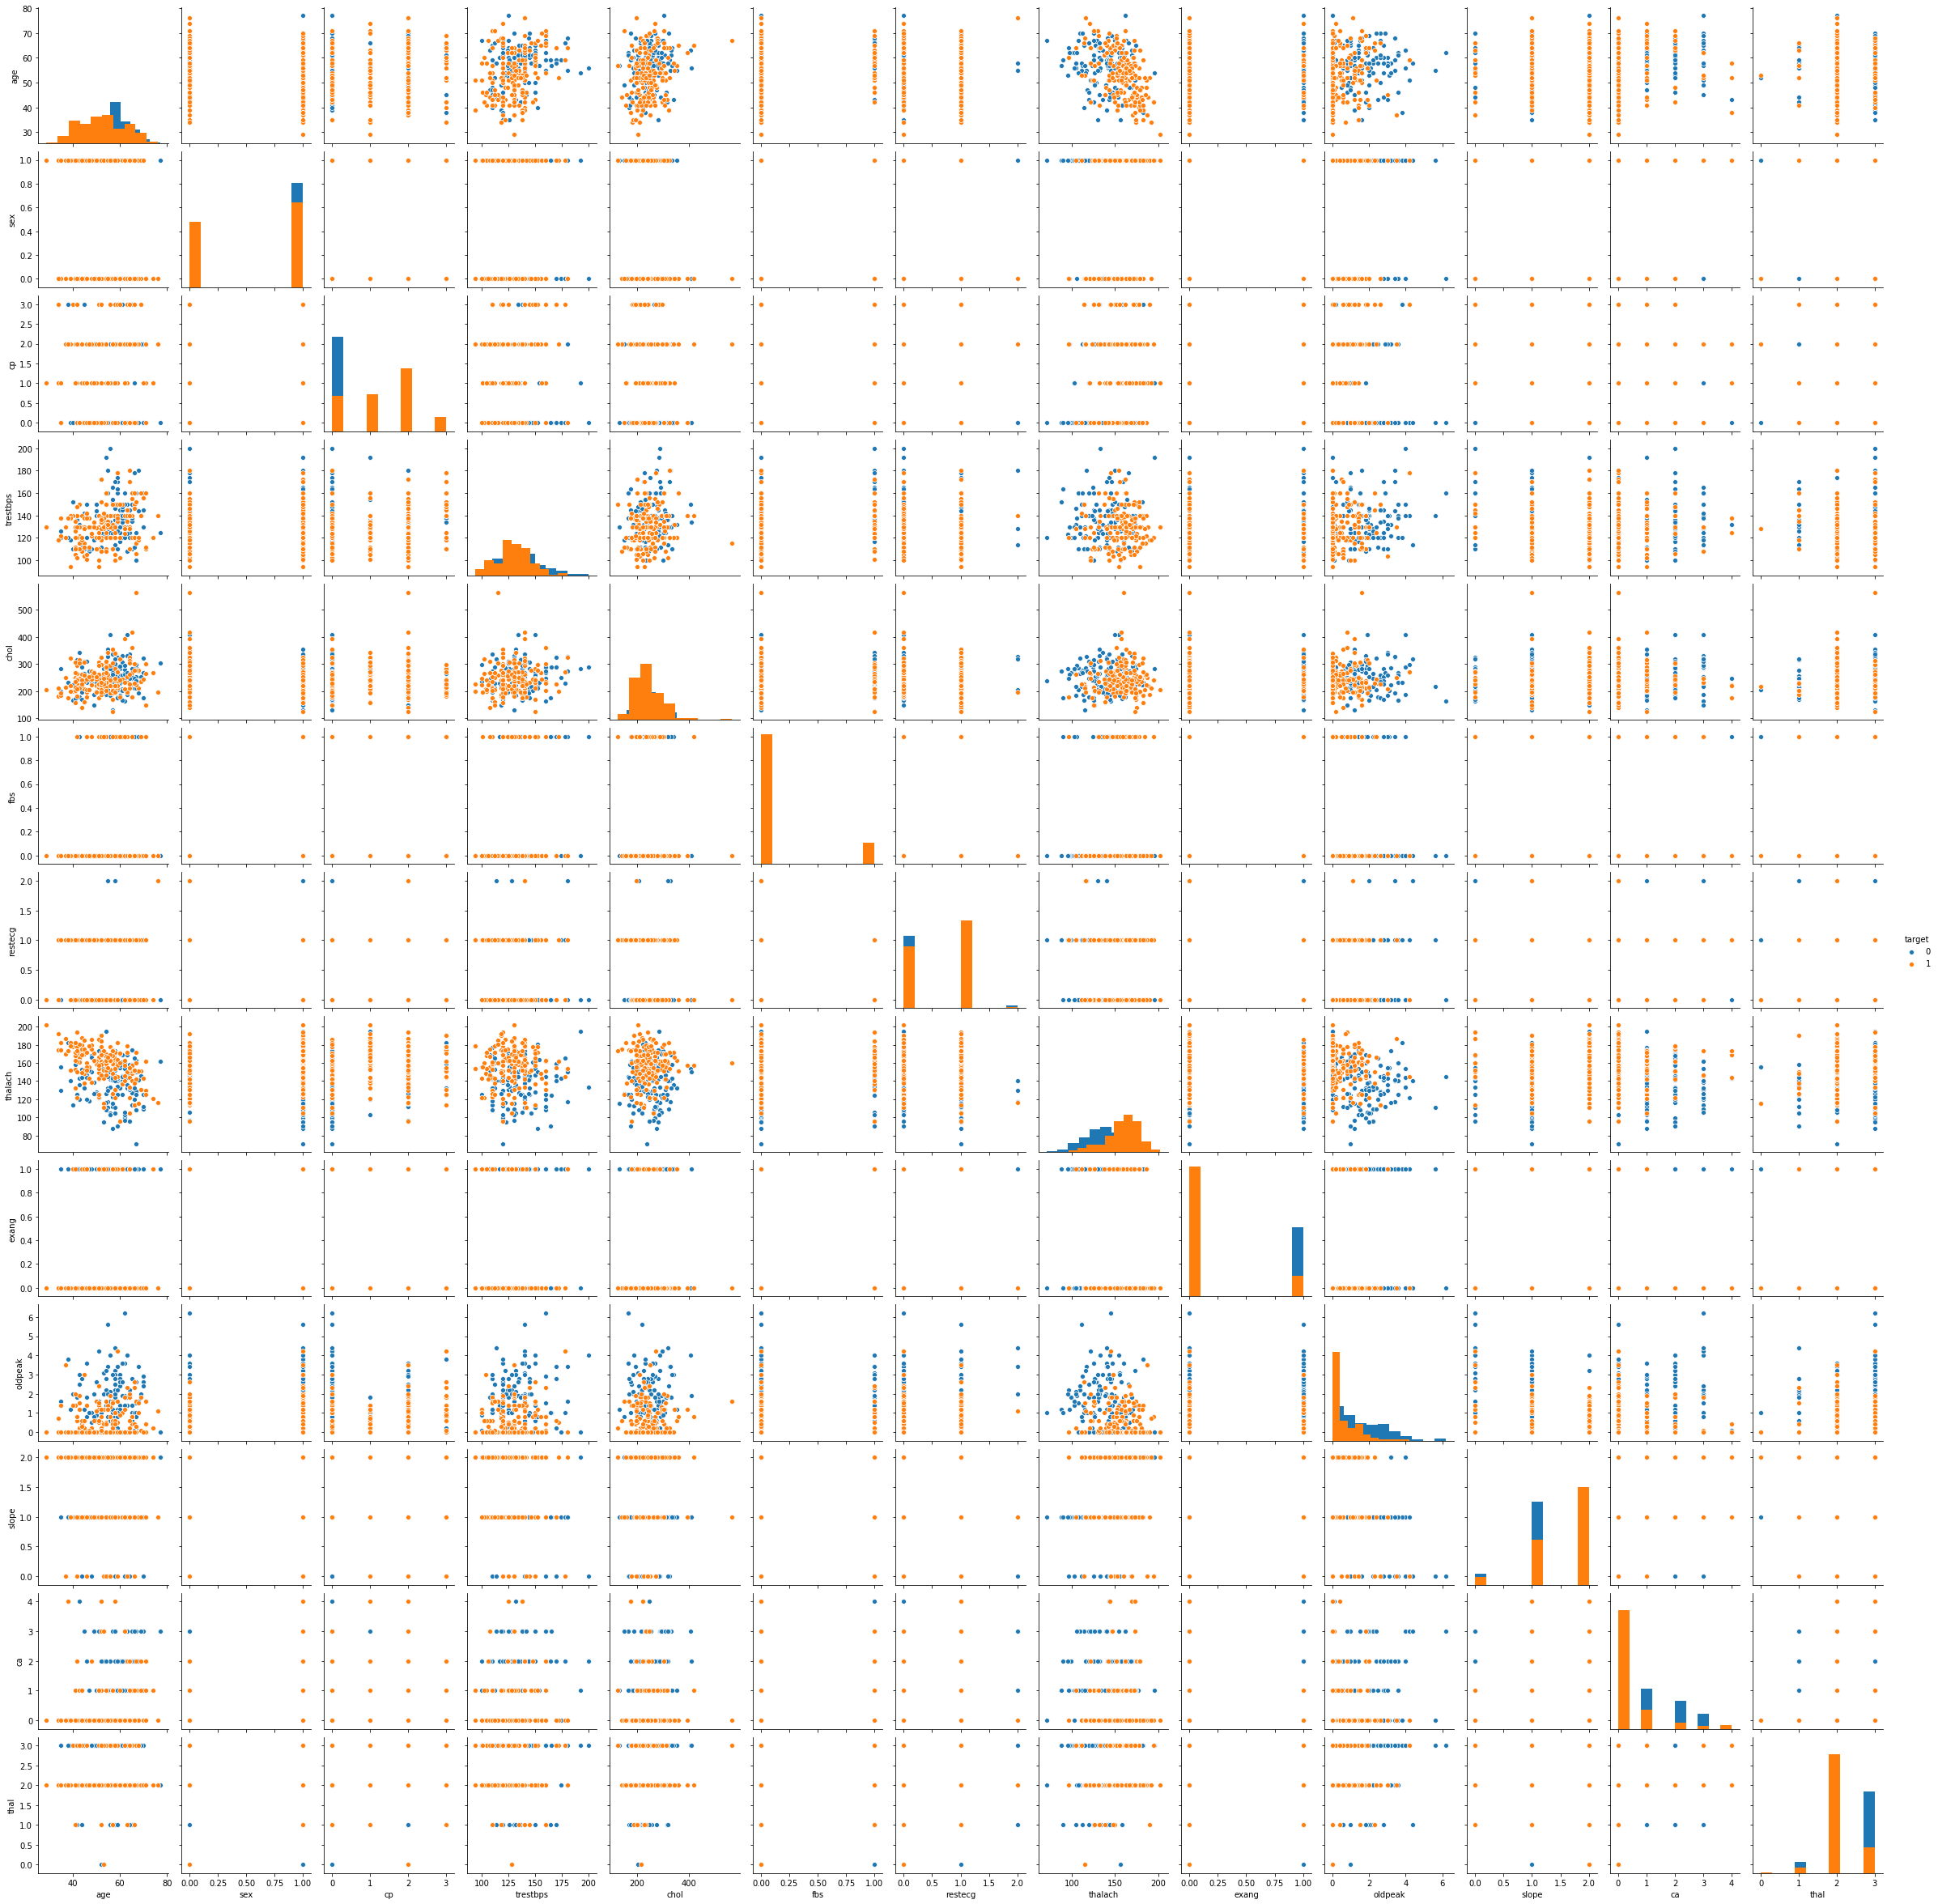

In [126]:
# Pair Plot
sns.pairplot(df, hue='target', diag_kind='hist')

In [127]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

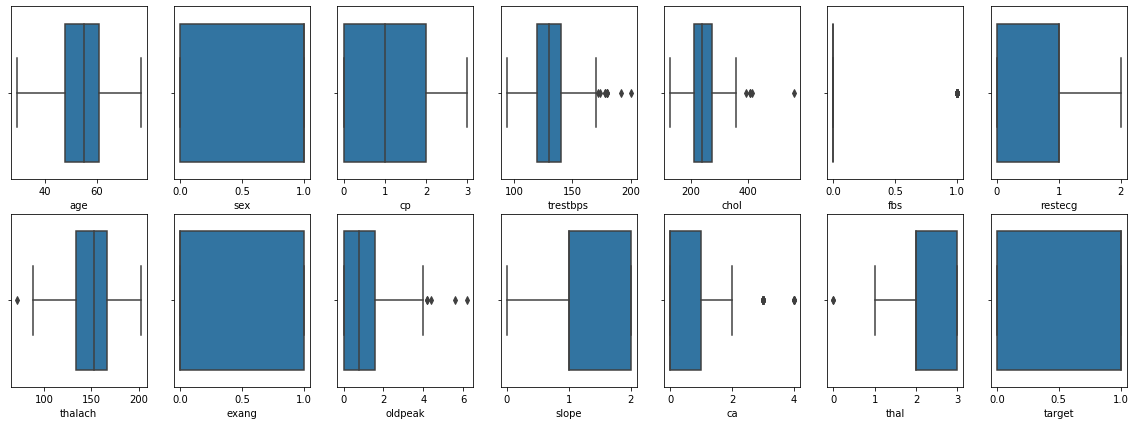

In [128]:
# Box Plot for Outliers
c=1
plt.figure(figsize=(20,7))
for x in df.columns:
    plt.subplot(2,7,c)
    sns.boxplot(df[x])
    c=c+1

The columns 'sex', 'cp', 'fbs', 'restecg',  'exang', 'slope', 'ca', 'thal' are nominal categorical variables, whic are are to be one-hot encoded so that numeric preference is not assosiated. 

In [129]:
# Seperating Features and Target Variables
features_df = df.drop('target', axis=1)
label_df = df['target']
rf = RandomForestClassifier(n_estimators=100,oob_score=True, random_state=10)
cv_base = cross_val_score(rf, features_df, label_df, scoring='accuracy', n_jobs=-1, cv=5)
cv_base.mean()

0.8282513661202187

# DATA PREPROCESSING

In [130]:
# One-Hot Encoding
ncv = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [131]:
df.head(3)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0


In [132]:
# Seperating Features and Target Variables
features_df = df.drop('target', axis=1)
label_df = df['target']

In [133]:
rf = RandomForestClassifier(n_estimators=100,oob_score=True, random_state=10)
cv_base = cross_val_score(rf, features_df, label_df, scoring='accuracy', n_jobs=-1, cv=5)
cv_base.mean()

0.8248633879781421

# FEATURE SELECTION

In [134]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighborse import KNeighbors

In [191]:
rf_fs = RandomForestClassifier(criterion='entropy', random_state=10 )
rf_fs.fit(features_df, label_df)
feat_rf= pd.Series(rf_fs.feature_importances_, index=features_df.columns)

In [192]:
et_fs = ExtraTreesClassifier( random_state=10 )
et_fs.fit(features_df, label_df)
feat_et= pd.Series(et_fs.feature_importances_, index=features_df.columns)

In [137]:
#  Forward Selection using mlextend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs_rf  =  sfs(RandomForestClassifier(random_state=10),k_features=30, scoring='accuracy', cv=5)
sfs_rf.fit(features_df, label_df)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
 

In [ ]:
feat_mlex = list( sfs_rf.get_metric_dict()[22]['feature_names'])

In [184]:
# Backward Selection using mlextend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs_rf  =  sfs(RandomForestClassifier(random_state=10), scoring='accuracy', cv=5, forward= False)
sfs_rf.fit(features_df, label_df)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
 

In [196]:
feat_mlex_re = list(sfs_rf.get_metric_dict()[26]['feature_names'])

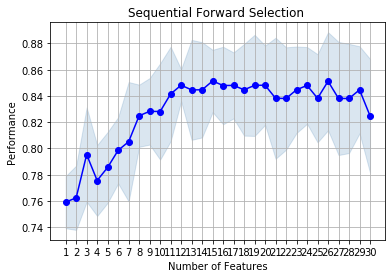

In [204]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig = plot_sfs(sfs_rf.get_metric_dict())

plt.title('Sequential Forward Selection ')
plt.grid()
plt.show()

In [193]:

feat_et = list(feat_et.nlargest(22).index)
feat_rf = list(feat_rf.nlargest(22).index)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE




In [197]:
df_mlex = df[feat_mlex]
df_et = df[feat_et]
df_rf = df[feat_rf]
df_mlex_re = df[feat_mlex_re]

In [198]:
rf = RandomForestClassifier(n_estimators=100,oob_score=True, random_state=10)
cv_mlex = cross_val_score(rf, df_mlex, label_df, scoring='accuracy', n_jobs=-1, cv=5)
cv_mlex.mean()

KeyboardInterrupt: 

In [181]:
cv_mlex = cross_val_score(rf, df_et, label_df, scoring='accuracy', n_jobs=-1, cv=5)
cv_mlex.mean()

0.8250273224043715

In [182]:
cv_mlex = cross_val_score(rf, df_rf, label_df, scoring='accuracy', n_jobs=-1, cv=5)
cv_mlex.mean()

0.8316393442622951

In [200]:
cv_mlex = cross_val_score(rf, df_mlex_re, label_df, scoring='accuracy', n_jobs=-1, cv=5)
cv_mlex.mean()

0.8512021857923496